(0.0, 100.0)

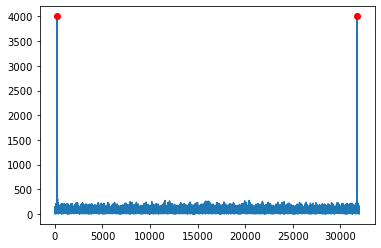

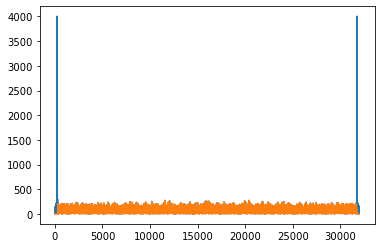

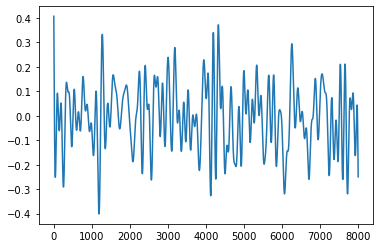

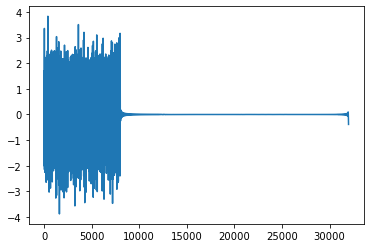

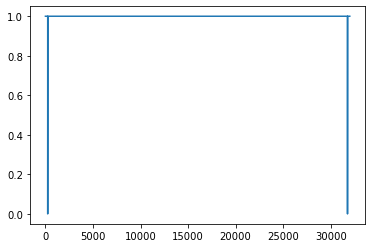

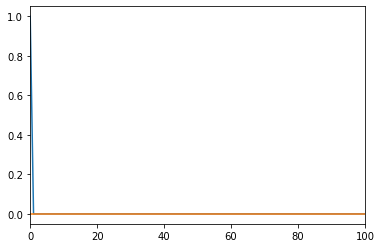

In [17]:
import numpy as np
import matplotlib.pyplot as plt

fs = 8000
mains_frequency = 60
T = fs

np.random.seed(12345)
white_noise = np.random.normal(0,1,T)
x = np.sin(2*np.pi*mains_frequency/fs*np.arange(T)) + white_noise

N = len(x)
upsample_factor = 4
x_fft = np.fft.fft(x)
bin_at_60Hz = int(upsample_factor*N*mains_frequency/fs)
bin_at_fson2_minus_60Hz = upsample_factor*N - bin_at_60Hz

X = np.fft.fft(x,N*4)

plt.figure(1)
plt.plot(np.abs(X))
plt.plot(bin_at_60Hz, np.abs(X[bin_at_60Hz]),'ro')
plt.plot(bin_at_fson2_minus_60Hz, np.abs(X[bin_at_fson2_minus_60Hz]),'ro')


Y = X.copy()
Y[(bin_at_fson2_minus_60Hz-50):N*upsample_factor] = 0
Y[0:(bin_at_60Hz+50)] = 0

plt.figure(2)
plt.plot(np.abs(X))
plt.plot(np.abs(Y))

y = np.real(np.fft.ifft(Y))

plt.figure(3)
plt.plot(white_noise-y[0:N])

plt.figure(4)
plt.plot(y)

notch_filter = np.ones(X.shape)
notch_filter[bin_at_60Hz] = 0
notch_filter[bin_at_fson2_minus_60Hz] = 0

plt.figure(5)
plt.plot(notch_filter)


h_notch = np.fft.ifft(notch_filter)

plt.figure(6)
plt.plot(np.real(h_notch))
plt.plot(np.imag(h_notch))

plt.xlim([0,100])

In [19]:
np.sum(np.imag(h_notch))

0.0